### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### Motivation
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not? 

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')

In [2]:
# Load the dataset
diab = pd.read_csv('Pima_Indians/diabetes.csv')

In [6]:
# Review the first five columns of the dataset
diab.head()
# Look at the 'Outcome' variable. Is this a regression or 
# classification problem?

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
# Let's review the shape of our data
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Check the data
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The data looks clean. Let's begin our analysis.

### Basic Exporatory Data Analysis (EDA)

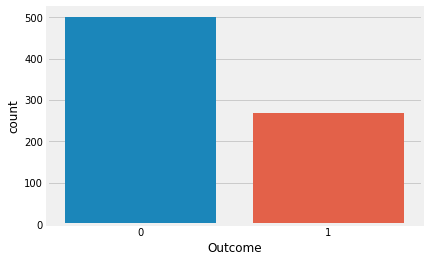

In [12]:
# https://www.datacamp.com/community/tutorials/seaborn-python-tutorial?utm_source=adwords_ppc&utm_campaignid=1565261270&utm_adgroupid=67750485268&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=332661264374&utm_targetid=dsa-473406580275&utm_loc_interest_ms=&utm_loc_physical_ms=9010885&gclid=EAIaIQobChMI-4G8r7K65AIVStbACh2QSAIrEAAYASAAEgKUqfD_BwE
# https://seaborn.pydata.org/

sns.countplot(x='Outcome', data=diab)
plt.show()

#### Brief Analysis of the data

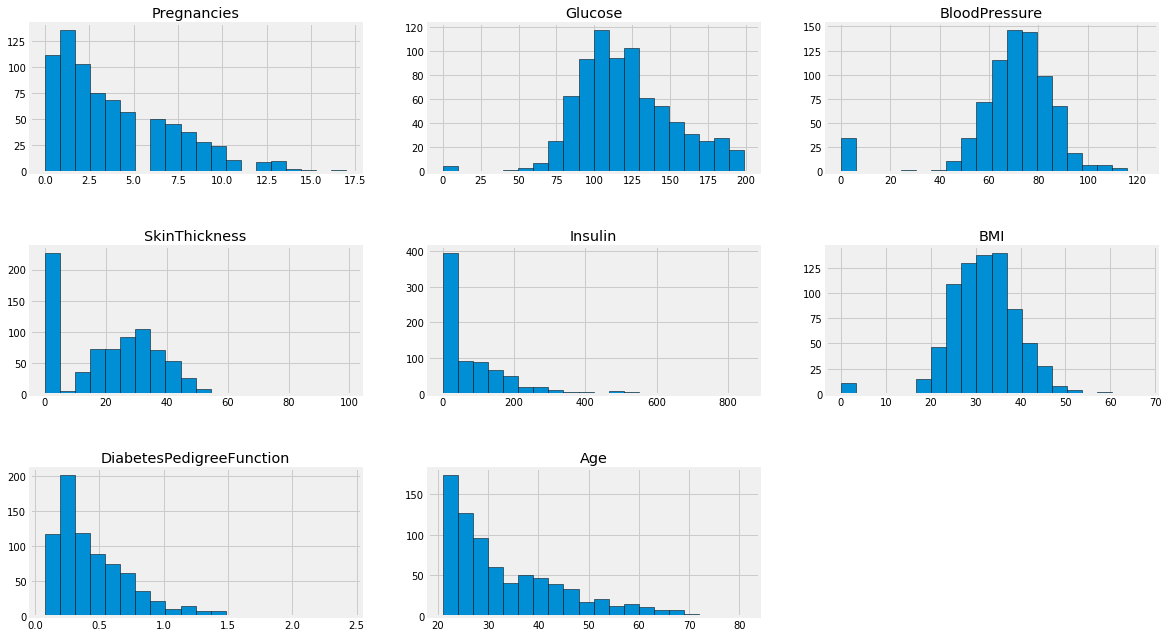

In [13]:
columns = diab.columns[:8]
plt.subplots(figsize=(18,15))
length = len(columns)
for i, j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    diab[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

#### Analysis of Diabetic Cases

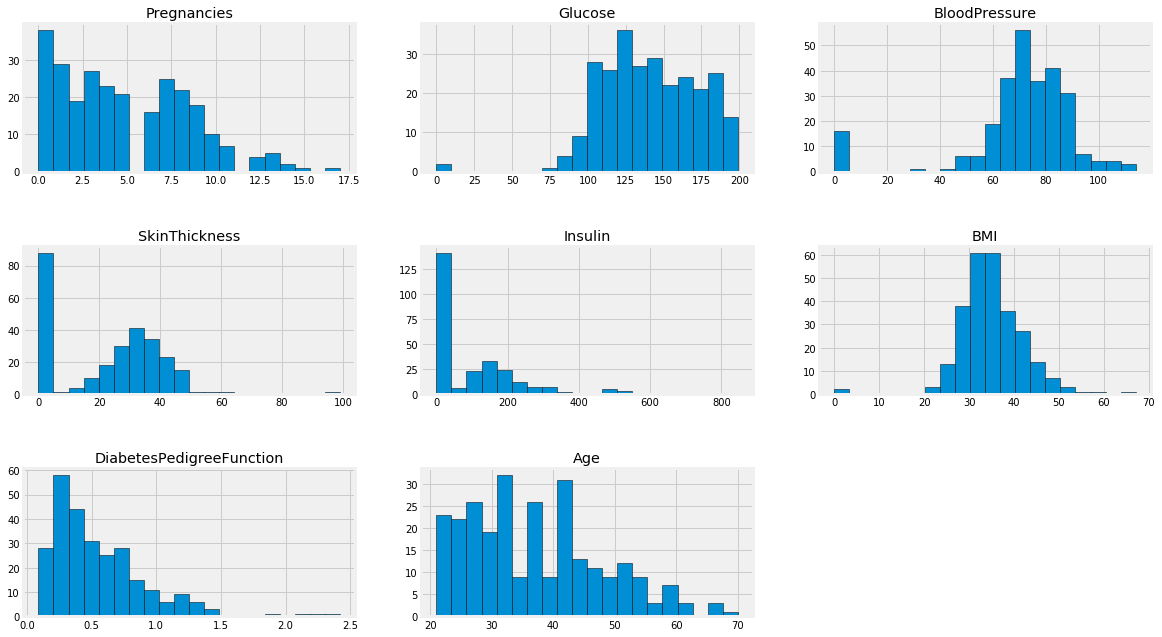

In [25]:
diab1=diab[diab['Outcome'] == 1]
columns = diab.columns[:8]
plt.subplots(figsize=(18, 15))
length=len(columns)
for i, j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

#### PairPlots:
Let's see the distribution of the features in the dataset

In [28]:
#sns.pairplot(data=diab,hue='Outcome',diag_kind='kde')
#plt.show()

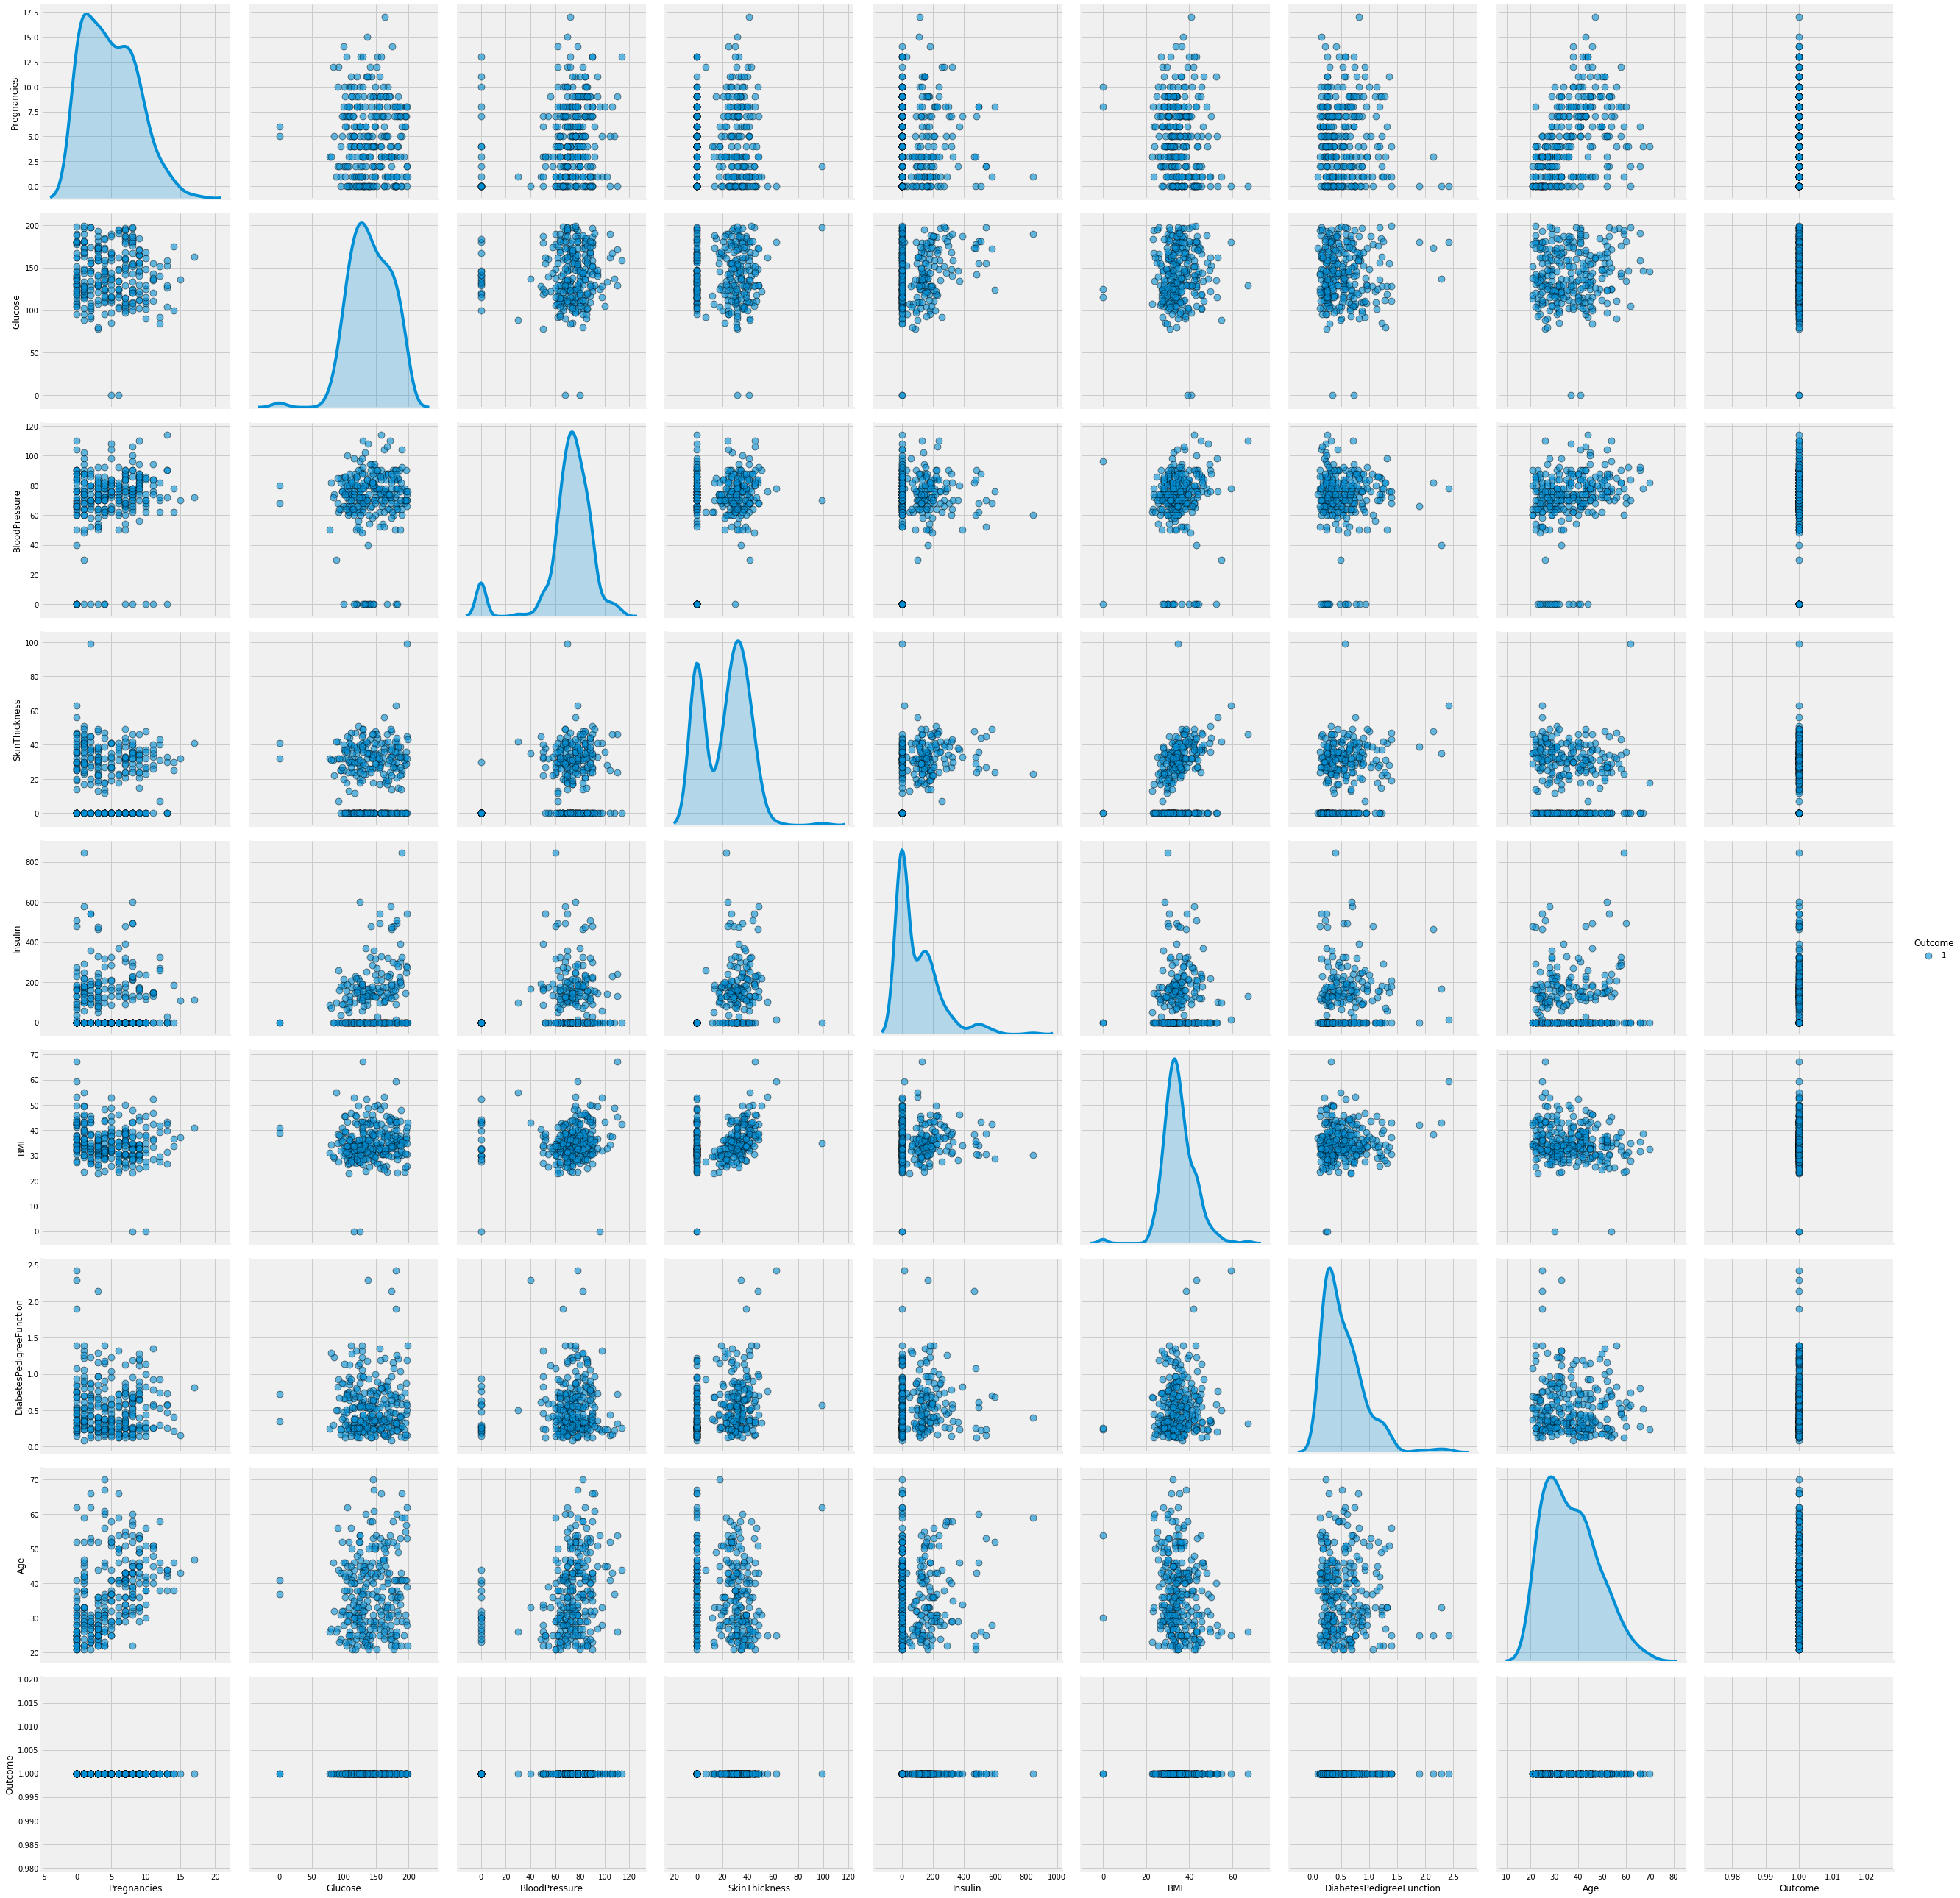

In [40]:
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

sns.pairplot(data=diab,hue="Outcome", diag_kind='kde', # Kernel Density Estimation
            plot_kws = {'alpha':0.6, 's': 80, 'edgecolor': 'k'},
            height = 4)
plt.show()